In [1]:
import torch
import skimage
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from utils import *

In [3]:
cyclones_path = "./list_of_cyclones.xlsx"
df = pd.read_excel(cyclones_path)
df = df.drop('Unnamed: 8', axis=1)
df = df.dropna()

device = torch.device("cuda")

In [4]:
idx = 47
row = df.iloc[idx]
region = row["Region"]
name = row["Name"]
cyclone = Cyclone(region, name)
cyclone.load_era5()

In [5]:
satmap_idx = cyclone.metadata["count"]//2    
ir108_fn = cyclone.metadata['satmaps'][satmap_idx]['ir108_fn']
ir108_scn = cyclone.get_ir108_data(ir108_fn)

img = ir108_scn.to_numpy() ; 
img = transform_make_sq_image(img)

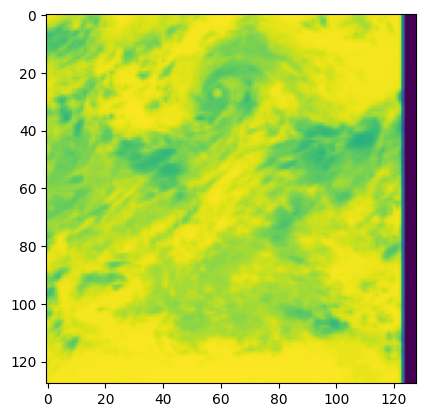

In [6]:
img_64 = skimage.transform.resize(img, (128, 128), anti_aliasing=True)
plt.imshow(img_64) ;

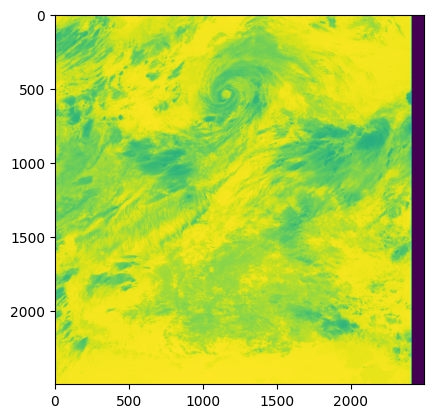

In [7]:
img = torch.from_numpy(img).to(device)
plt.imshow(img.cpu()) ;

In [8]:
era5_idx = cyclone.metadata['satmaps'][satmap_idx]['era5_idx']
era5 = torch.from_numpy(cyclone.get_era5_data(era5_idx))
era5.shape

torch.Size([32, 200, 200])

In [9]:
sk_era5 = cyclone.get_era5_data(era5_idx)
sk_era5 = skimage.transform.resize(sk_era5, (32, 128, 128), anti_aliasing=True)
sk_era5.shape

(32, 128, 128)